In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [155]:
np.random.seed(0)
n_samples = 30
degrees = [1, 3, 12]

X = np.random.rand(n_samples) * 2
y = np.sin(np.pi * X) + np.random.randn(n_samples) * 0.4

In [156]:
preds = list()
X_test = np.linspace(0, 2, 100)

for i in range(len(degrees)):
    # Fit PolynomialFeatures to your input data
    polynomial_features = PolynomialFeatures(degrees[i])
    polynomial_features.fit(X[:, np.newaxis], y)

    #Transform the original input data to obtain polynomial features
    X_poly = polynomial_features.transform(X[:, np.newaxis])

    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # predict on the new data
    new_data_poly = polynomial_features.transform(X_test[:, np.newaxis])
    preds.append(model.predict(new_data_poly))

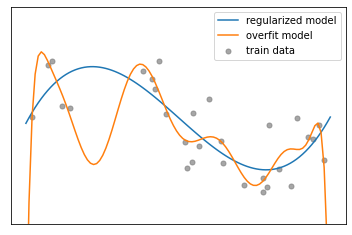

In [157]:
ax = plt.subplot()
plt.setp(ax, xticks=(), yticks=())
#plt.plot(X_test, np.sin(np.pi * X_test), label='Actual', color='k')
plt.scatter(X, y, s=25, label='train data', alpha=0.7, color = 'grey')
#plt.plot(X_test, preds[0], label='Model(Degree 1)')
plt.plot(X_test, preds[1], label='regularized model')
plt.plot(X_test, preds[2], label='overfit model')
plt.ylim(-2,2)
plt.legend()
plt.show()